In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

<font size = 4 color = 'red' > Question 1 </font>

In [3]:
# We would like to investigate the cumulative probabilities for the density function with measurements from -3 to 3
x = np.linspace(-3,3,1000)
y = stats.norm.cdf(x) # we use norm.cdf(x) to find the probabilities for x
z = stats.norm.ppf(y) # we use the probabilies that we just derived as an input to norm.ppf()to find their corresponding sigmas
np.allclose(x,z) # since ppf is the inverse function of cdf, we can expect that the transformation above will yield True  

True

There are half of those data are negative since half of them (from -3 to 0) are less than the mean value of all data,
which causes $(x-{\mu})$ to be negative 

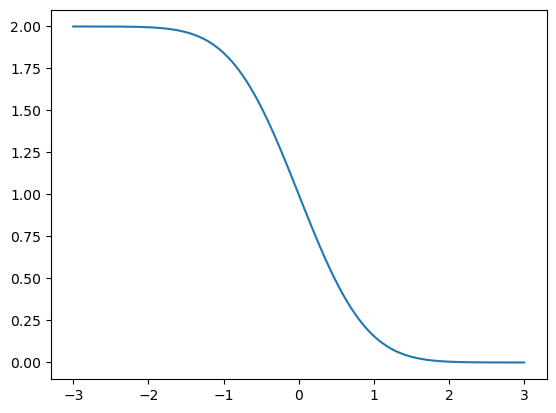

In [4]:
fig,ax = plt.subplots()
ax.plot(x,scipy.special.erfc(x))

<font size = 4 color = 'red' > Question 2 </font>

In [5]:
x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 1000000)

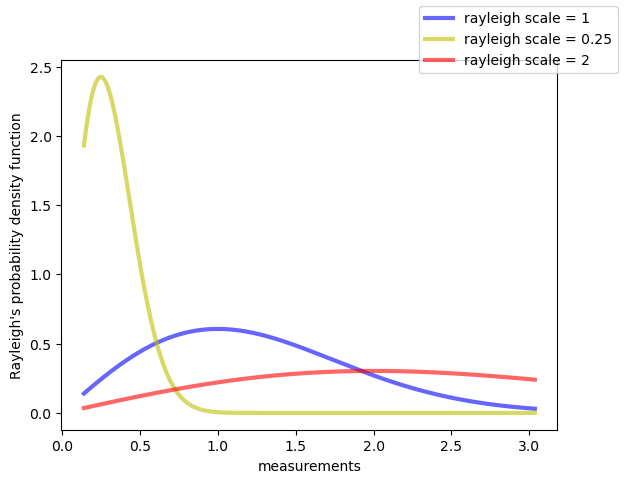

In [6]:
## We can plot the Rayleigh's probability density function in different scales
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.rayleigh.pdf(x,scale = 1),'b-', lw=3, alpha=0.6, label='rayleigh scale = 1')
ax.plot(x, stats.rayleigh.pdf(x,scale = 0.25),'y-', lw=3, alpha=0.6, label='rayleigh scale = 0.25')
ax.plot(x, stats.rayleigh.pdf(x,scale = 2),'r-', lw=3, alpha=0.6, label='rayleigh scale = 2')
fig.legend()
ax.set_xlabel("measurements")
ax.set_ylabel("Rayleigh's probability density function")
plt.show()

<font size = 4 color = 'red'> Question 3 </font>

In [7]:
# Measurement : 2 
# QUESTION : What is the probibility that background noise giving me a data point that is 
#            equally or more signal-like than the reading of 2 ?

In [8]:
# The integral below express the procedure to calculate probabilities that correspond to all pdf area above measurement 2. 

Integral :  $$1 - \int_{2}^{\infty} pdf(x) dx $$

In [9]:
# we use cdf function to find the probabilities that's below the measurement of 2
prob = 1 - stats.rayleigh.cdf(2,loc=0, scale = 1) 

# then we use the probabilies calculated above as an input to find the corresponding sigma in a norm/Gaussian distribution
sigma = stats.norm.ppf(prob)

In [10]:
sigma

-1.10151962849875

In [11]:
# The value of sigma is negative since it's one the left side of mean value of Gaussian distribution

<font color = 'red' size = 4> Question 4 </font>

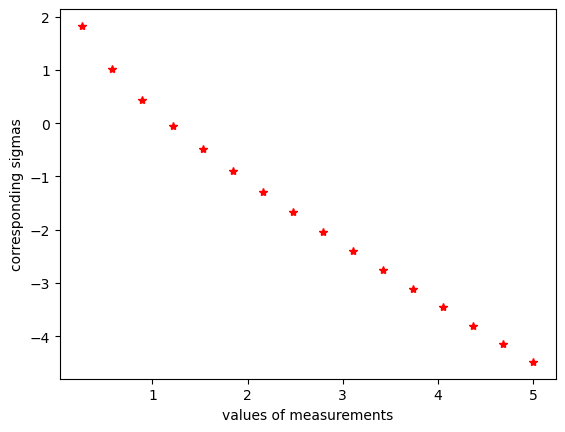

In [12]:
## If I want to measure all sigmas of data from -1 to 5 in Rayleigh, then :

x_vals = np.linspace(-1,5,20)
y_vals = stats.norm.ppf(1-stats.rayleigh.cdf(x_vals,loc = 0, scale = 1))
fig3,ax3 = plt.subplots()
ax3.set_xlabel("values of measurements")
ax3.set_ylabel("corresponding sigmas")
ax3.plot(x_vals,y_vals,'r*',label = "")

In [13]:
# From the plot above, we can see a negative correlation between sigmas and values of measurements;
# In other words, larger the value we choose to measure, smaller the sigma is in the corresponding Gaussian distribution


<font size = 4 color = 'red'> Question 5 : Non-continuous distribution </font>

In [14]:
# I chose the Poisson distribution to do more research. 
# Brief intro to Poisson distribution :
# Poisson distribution is often used to measure the probabilities of some rare events over a very long period of time

In [15]:
# We can change the value of parameter mu here as well
# mu = 10

In [16]:
# From the graphs below, we can found that : When we increase the value of parameter mu, the mean value of distribution also 
# changes. Also, when the value of mu increases, there are more points on the graph.

In [25]:
x = np.arange(stats.poisson.ppf(0.01, 10),stats.poisson.ppf(0.99, 10))

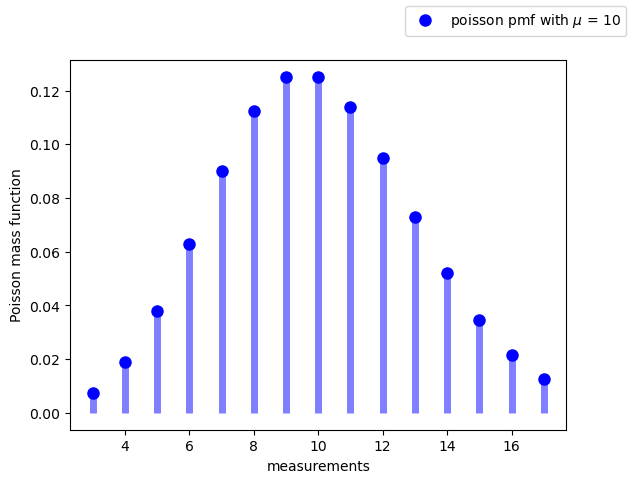

In [26]:
fig2,ax2 = plt.subplots()
ax2.plot(x, stats.poisson.pmf(x, 10), 'bo', ms=8, label='poisson pmf with $\mu$ = 10')
ax2.vlines(x, 0, stats.poisson.pmf(x, 10), colors='b', lw=5, alpha=0.5)
ax2.set_xlabel("measurements")
ax2.set_ylabel("Poisson mass function")
fig2.legend()

In [27]:
x = np.arange(stats.poisson.ppf(0.01, 5),stats.poisson.ppf(0.99, 5))

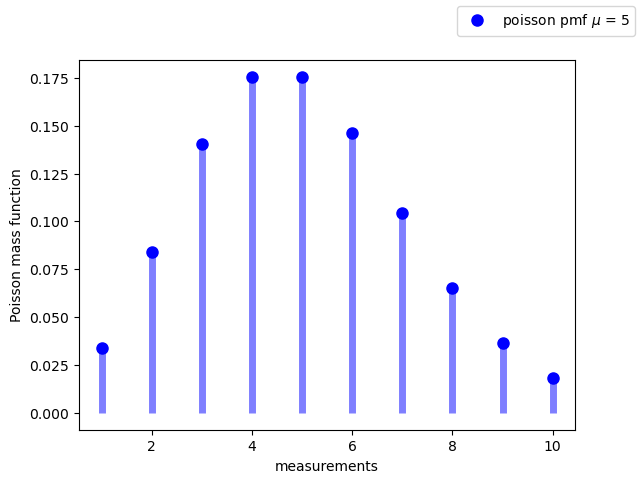

In [28]:
fig2,ax2 = plt.subplots()
ax2.plot(x, stats.poisson.pmf(x, 5), 'bo', ms=8, label='poisson pmf $\mu$ = 5')
ax2.vlines(x, 0, stats.poisson.pmf(x, 5), colors='b', lw=5, alpha=0.5)
ax2.set_xlabel("measurements")
ax2.set_ylabel("Poisson mass function")
fig2.legend()

In [29]:
x = np.arange(stats.poisson.ppf(0.01, 1),stats.poisson.ppf(0.99, 1))

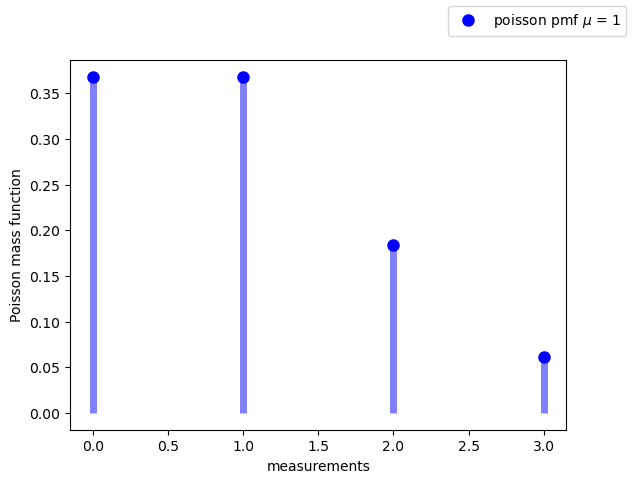

In [30]:
fig2,ax2 = plt.subplots()
ax2.plot(x, stats.poisson.pmf(x, 1), 'bo', ms=8, label='poisson pmf $\mu$ = 1')
ax2.vlines(x, 0, stats.poisson.pmf(x, 1), colors='b', lw=5, alpha=0.5)
ax2.set_xlabel("measurements")
ax2.set_ylabel("Poisson mass function")
fig2.legend()

In [26]:
## One of questions we can ask is : given that the mean value is 2, 
## what is the probibility that background noise giving me a data point that is equally or more signal-like
## than the reading of 2 ?

In [38]:
mu = 2
prob = 1 - stats.poisson.cdf(2,mu,loc=0)
prob

0.3233235838169366

In [ ]:
# So the probabilities when expected value = 2 is about 32 percent

In [39]:
sigma = stats.norm.ppf(prob)
sigma 

-0.45842495327867266

In [40]:
# So the corresponding sigmas is around -0.458 given the mean value = 2

In [13]:
# We should expect the values of probabilities and sigmas are also discrete as the distribution because these discrete values
# of measurements,e.g., 1,2 ..., will only yield discrete probabilities, and in normal distribution, we have corresponding 
# sigmas. Thus, sigmas are also discrete. 
# We can verify the above assumption by : 
mu = 2
x = np.arange(stats.poisson.ppf(0.01, mu),stats.poisson.ppf(0.99, mu))
prob = 1 - stats.poisson.cdf(x,mu,loc=0)
print(prob)
sigma = stats.norm.ppf(prob)
print(sigma)

[0.86466472 0.59399415 0.32332358 0.14287654 0.05265302 0.01656361]
[ 1.10151963  0.23783161 -0.45842495 -1.06748457 -1.61965674 -2.13053806]


In [ ]:
# We can see above that probabilies and sigmas are also discrete
# The implication of having discrete distribution, probabilies and sigmas is that we should expect to see only some of sigmas 
# while conducting the experiement with discrete distribution

In [41]:
## The reason for allowing to have continuous parameters for discrete distributions is that the probability for each discrete 
## notch has continuous probability values, which causes the mean or expected value of all data to be continuous. 